In [85]:
import pandas as pd

df = pd.read_csv("../data/01_raw/winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [86]:
df_summary = pd.DataFrame({
    "dtype": df.dtypes,
    "nulls": df.isnull().sum(),
    "nulls_%": (df.isnull().mean() * 100).round(2),
    "n_unique": df.nunique()
}).sort_values(by="nulls", ascending=False)

df_summary


,dtype,nulls,nulls_%,n_unique
region_2,object,79460,61.14,17
designation,object,37465,28.83,37979
taster_twitter_handle,object,31213,24.02,15
taster_name,object,26244,20.19,19
region_1,object,21247,16.35,1229
price,float64,8996,6.92,390
country,object,63,0.05,43
province,object,63,0.05,425
variety,object,1,0.00,707
description,object,0,0.00,119955


In [87]:
df_clean = df.drop(columns=["region_2", "designation", "description", "title", "winery"])

In [88]:
df_summary = pd.DataFrame({
    "dtype": df_clean.dtypes,
    "nulls": df_clean.isnull().sum(),
    "nulls_%": (df_clean.isnull().mean() * 100).round(2),
    "n_unique": df_clean.nunique()
}).sort_values(by="nulls", ascending=False)

df_summary


,dtype,nulls,nulls_%,n_unique
taster_twitter_handle,object,31213,24.02,15
taster_name,object,26244,20.19,19
region_1,object,21247,16.35,1229
price,float64,8996,6.92,390
country,object,63,0.05,43
province,object,63,0.05,425
variety,object,1,0.00,707
points,int64,0,0.00,21


In [89]:
df_clean = df_clean.dropna(subset=["price"])

In [90]:
for col in df_clean.select_dtypes(include='object').columns:
    mode_val = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_val, inplace=True)


In [91]:
df_summary = pd.DataFrame({
    "dtype": df_clean.dtypes,
    "nulls": df_clean.isnull().sum(),
    "nulls_%": (df_clean.isnull().mean() * 100).round(2),
    "n_unique": df_clean.nunique()
}).sort_values(by="nulls", ascending=False)

df_summary


,dtype,nulls,nulls_%,n_unique
country,object,0,0.0,42
points,int64,0,0.0,21
price,float64,0,0.0,390
province,object,0,0.0,422
region_1,object,0,0.0,1204
taster_name,object,0,0.0,19
taster_twitter_handle,object,0,0.0,15
variety,object,0,0.0,697


In [92]:
df_clean

,country,points,price,province,region_1,taster_name,taster_twitter_handle,variety
1,Portugal,87,15.0,Douro,Napa Valley,Roger Voss,@vossroger,Portuguese Red
2,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris
3,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,@vossroger,Riesling
4,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir
5,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tempranillo-Merlot
...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,Napa Valley,Anna Lee C. Iijima,@vossroger,Riesling
129967,US,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Pinot Noir
129968,France,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Gewürztraminer
129969,France,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Pinot Gris


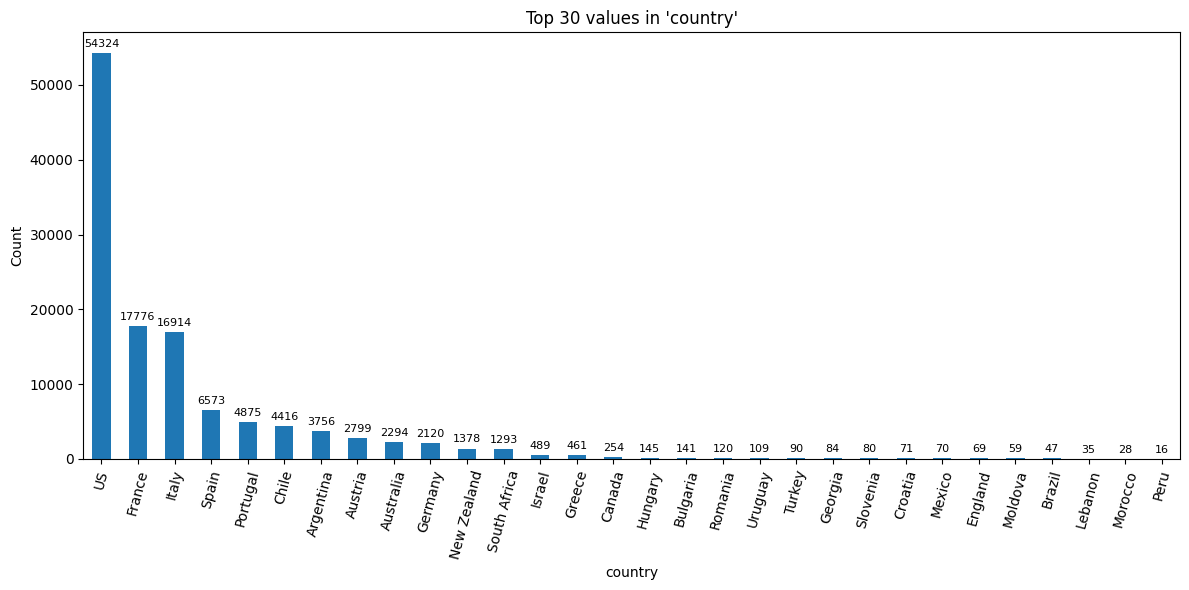

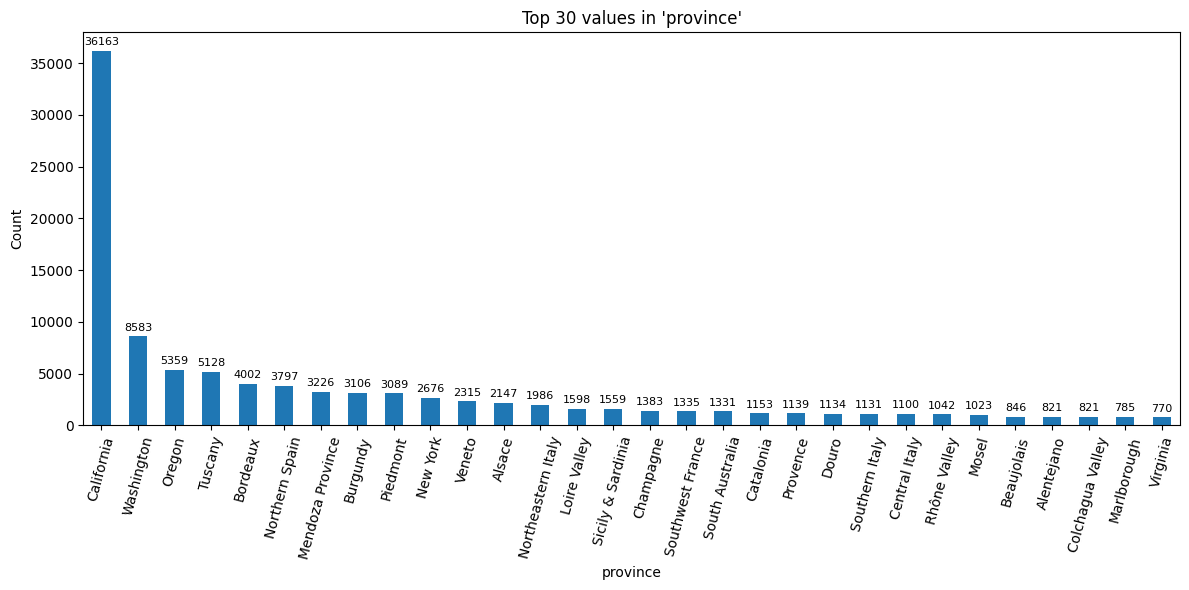

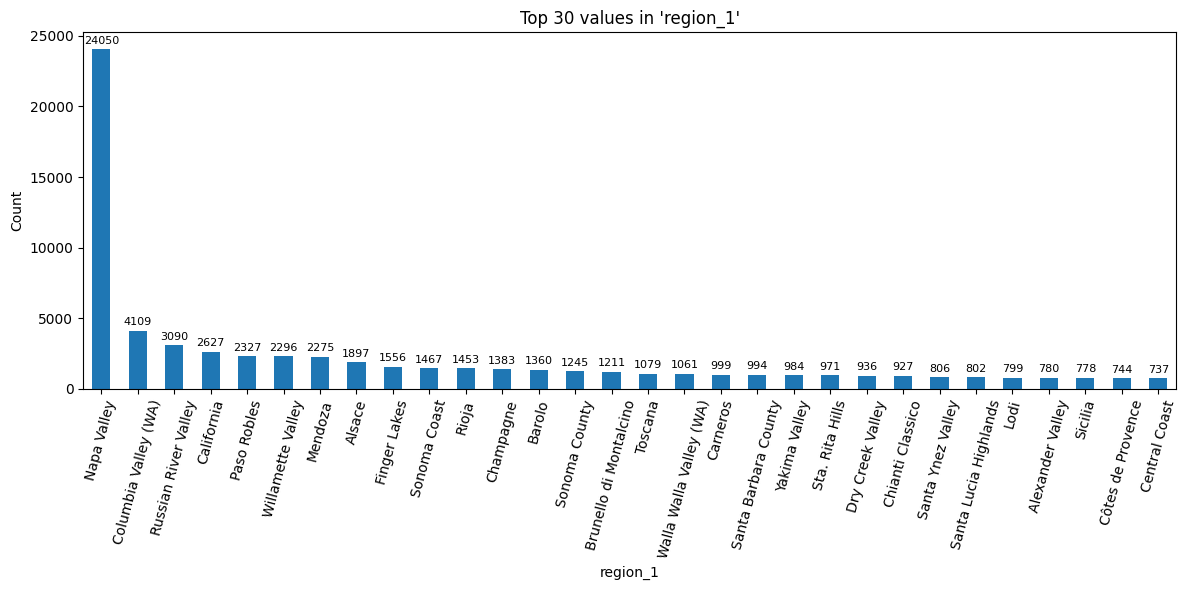

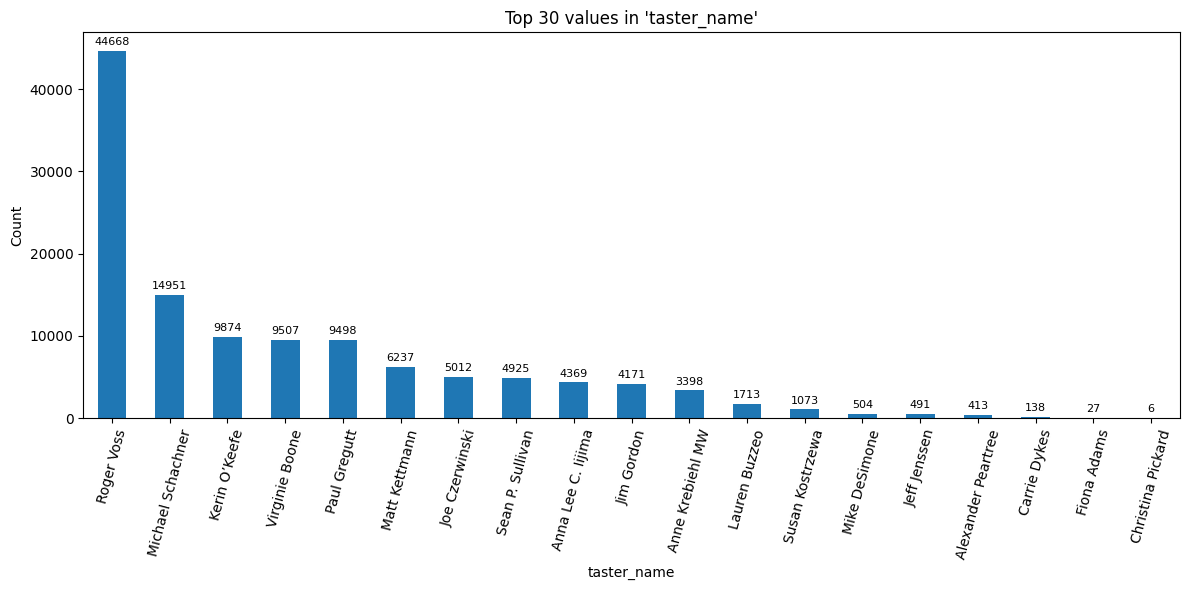

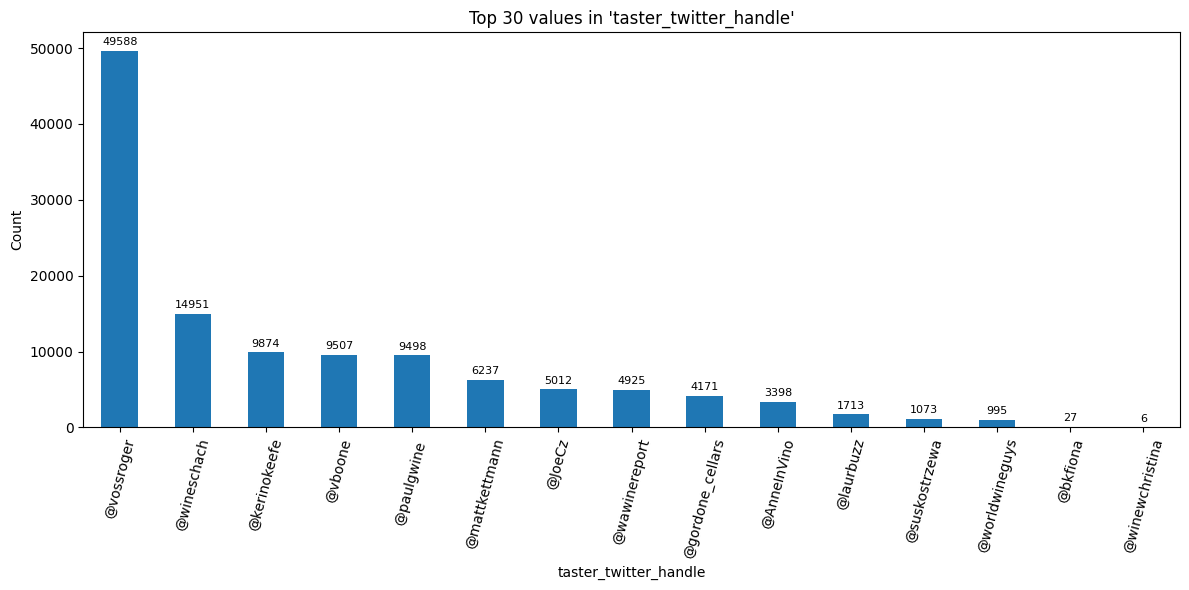

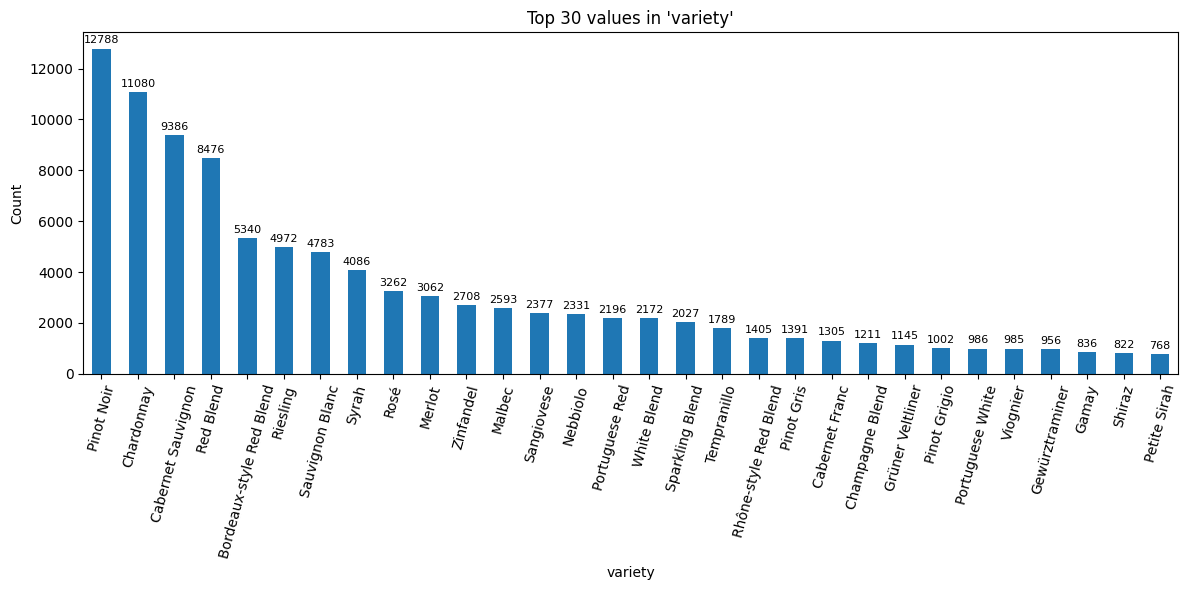

In [93]:
import matplotlib.pyplot as plt

categorical_cols = ['country', 'province', 'region_1', 'taster_name', 'taster_twitter_handle', 'variety']

for col in categorical_cols:
    top_values = df_clean[col].value_counts().nlargest(30)
    
    plt.figure(figsize=(12, 6))
    ax = top_values.plot(kind='bar')
    plt.title(f"Top 30 values in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=75)
    plt.tight_layout()
    
    # Add count labels on top of bars
    for i, value in enumerate(top_values):
        ax.text(i, value + max(top_values)*0.01, str(value), ha='center', va='bottom', fontsize=8)
    
    plt.show()


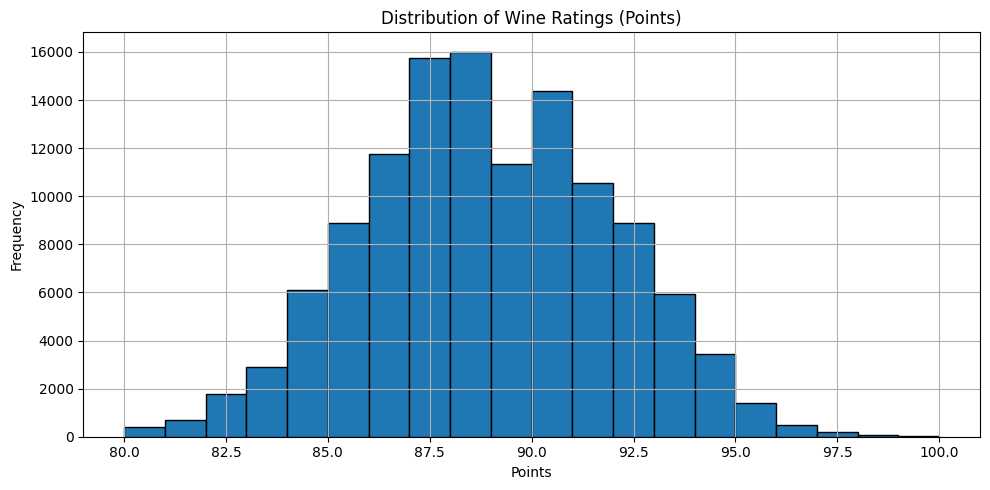

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_clean['points'], bins=20, edgecolor='black')
plt.title("Distribution of Wine Ratings (Points)")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
import pycountry_convert as pc

# Standardize problematic country names before mapping
df_clean['country_standardized'] = df_clean['country'].replace({
    'US': 'United States',
    'England': 'United Kingdom'
})

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return {
            'NA': 'North America',
            'SA': 'South America',
            'EU': 'Europe',
            'AS': 'Asia',
            'AF': 'Africa',
            'OC': 'Oceania',
        }[continent_code]
    except:
        return 'Other'

# Apply to standardized country names
df_clean['continent'] = df_clean['country_standardized'].apply(get_continent)

# (Optional) Inspect again
print(df_clean['continent'].value_counts())
print("Countries mapped to 'Other':")
print(sorted(df_clean[df_clean['continent'] == 'Other']['country'].unique()))


continent
North America    54648
Europe           52269
South America     8344
Oceania           3672
Africa            1321
Asia               721
Name: count, dtype: int64
Countries mapped to 'Other':
[]


<Axes: xlabel='continent'>

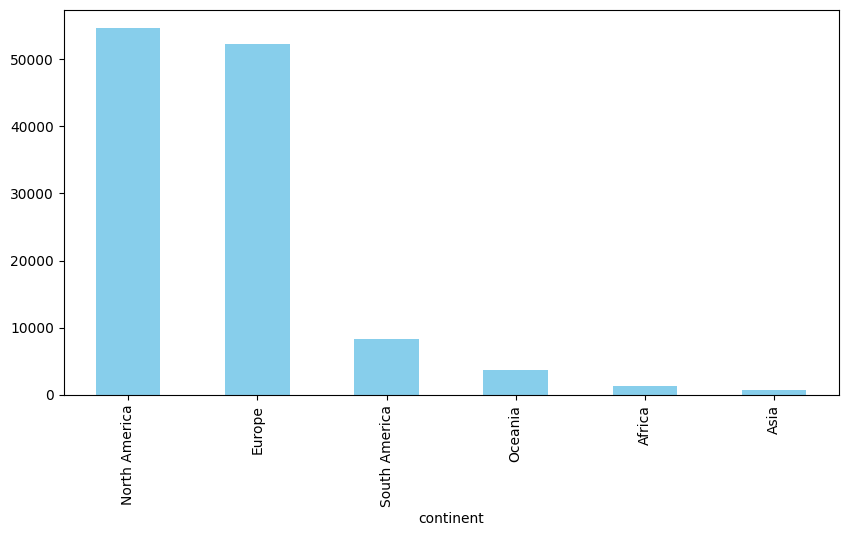

In [96]:
df_clean['continent'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')

In [97]:
taster_avg = df_clean.groupby('taster_name')['points'].mean()
df_clean['taster_avg_score'] = df_clean['taster_name'].map(taster_avg)


In [98]:
def classify_points(score):
    if score < 85:
        return 'Low'
    elif score < 90:
        return 'Medium'
    else:
        return 'High'

df_clean['points_category'] = df_clean['points'].apply(classify_points)


In [99]:
df_clean['is_blend'] = df_clean['variety'].str.contains("Blend", case=False)


In [100]:
blend_varieties = df_clean[df_clean['is_blend']]['variety'].value_counts()
print(blend_varieties)


variety
Red Blend                     8476
Bordeaux-style Red Blend      5340
White Blend                   2172
Sparkling Blend               2027
Rhône-style Red Blend         1405
Champagne Blend               1211
Bordeaux-style White Blend     695
Tempranillo Blend              583
Rhône-style White Blend        418
Cabernet Blend                  80
Austrian white blend            62
Provence red blend              59
Austrian Red Blend              54
Alsace white blend              49
Provence white blend            34
Touriga Nacional Blend          14
Grenache Blend                  10
Garnacha Blend                   2
Malbec Blend                     2
Madeira Blend                    2
Name: count, dtype: int64


In [115]:
red_terms = [
    'red', 'pinot noir', 'pinot nero', 'carmenère', 'nero d\'avola', 'mourvèdre',
    'blaufränkisch', 'primitivo', 'zinfandel', 'merlot', 'syrah', 'malbec',
    'sangiovese', 'nebbiolo', 'tempranillo', 'touriga nacional', 'tannat',
    'dolcetto', 'pinotage'
]

white_terms = [
    'white', 'pinot bianco', 'pinot blanc', 'grüner veltliner', 'sauvignon blanc',
    'riesling', 'pinot gris', 'pinot grigio', 'melon', 'vermentino', 'sémillon',
    'fiano', 'alvarinho', 'friulano', 'nerello', 'greco', 'grillo'
]

fortified_terms = ['port', 'sherry', 'tokay', 'muscat', 'tawny', 'botrytis']

def classify_wine_type_main(variety):
    v = variety.lower()
    if any(x in v for x in ['champagne', 'sparkling', 'prosecco']):
        return 'sparkling'
    elif 'rosé' in v or 'rose' in v:
        return 'rosé'
    elif any(x in v for x in fortified_terms):
        return 'fortified'
    elif any(x in v for x in red_terms):
        return 'red'
    elif any(x in v for x in white_terms):
        return 'white'
    else:
        return 'other'


In [116]:
full_red = {'shiraz', 'cabernet sauvignon', 'durif', 'malbec', 'mourvèdre', 'petit verdot'}
medium_red = {'merlot', 'grenache', 'tempranillo', 'sangiovese', 'montepulciano', 'cabernet franc', 'barbera', 'nero d’avola'}
light_red = {'pinot noir', 'pinot meunier', 'gamay'}

light_white = {'sauvignon blanc', 'riesling', 'semillon', 'pinot gris', 'pinot grigio', 'grüner veltliner', 'marsanne', 'fiano', 'moscato'}
full_white = {'chardonnay', 'viognier', 'vermentino', 'verdelho', 'albariño', 'gewürztraminer', 'arneis'}

red_blends = {'red blend', 'bordeaux-style red blend'}
white_blends = {'white blend', 'bordeaux-style white blend'}

sparkling_types = {'champagne', 'prosecco'}
fortified_types = {'tokay', 'muscat', 'sherry', 'tawny', 'botrytis'}

def classify_wine_subtype(variety):
    v = str(variety).lower()
    # Sparkling
    if any(x in v for x in sparkling_types):
        if 'rosé' in v or 'rose' in v:
            return 'sparkling rosé'
        return 'sparkling'
    # Fortified/dessert
    if any(x in v for x in fortified_types):
        return 'fortified'
    # Rosé
    if 'rosé' in v or 'rose' in v:
        return 'rosé'
    # Blends
    if any(x in v for x in red_blends):
        return 'red blend'
    if any(x in v for x in white_blends):
        return 'white blend'
    # Red subtypes
    if any(x in v for x in full_red):
        return 'full-bodied red'
    if any(x in v for x in medium_red):
        return 'medium-bodied red'
    if any(x in v for x in light_red):
        return 'light-bodied red'
    # White subtypes
    if any(x in v for x in light_white):
        return 'light-bodied white'
    if any(x in v for x in full_white):
        return 'full-bodied white'
    # Fallback
    main = classify_wine_type_main(v)
    return main


In [117]:
df_clean['wine_type_main'] = df_clean['variety'].apply(classify_wine_type_main)
df_clean['wine_subtype'] = df_clean['variety'].apply(classify_wine_subtype)


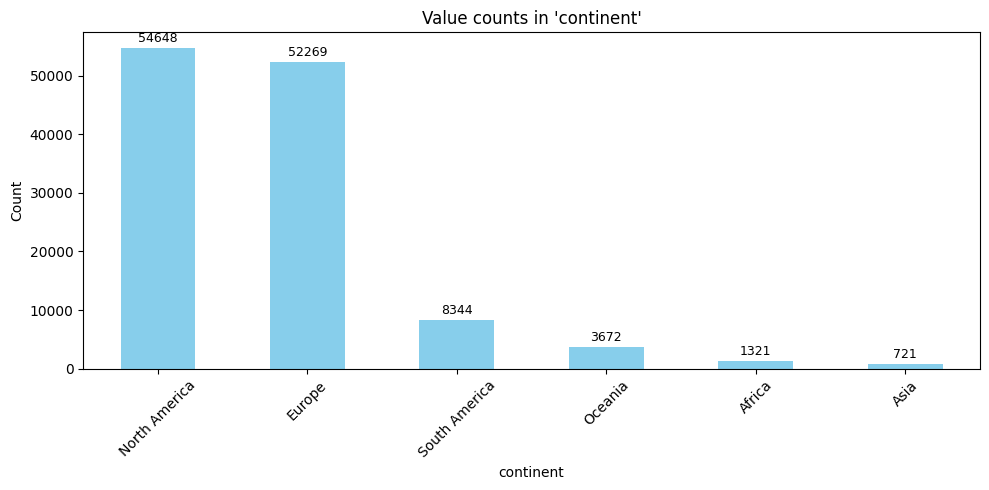

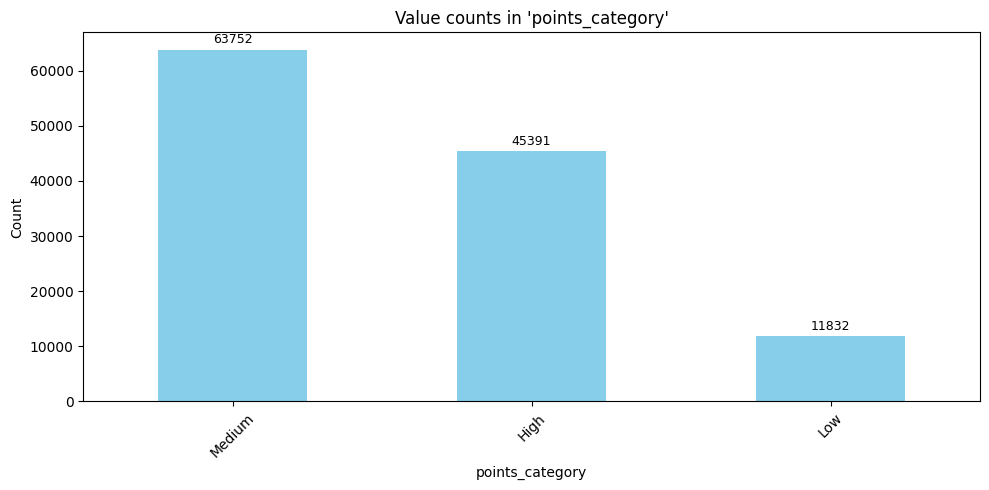

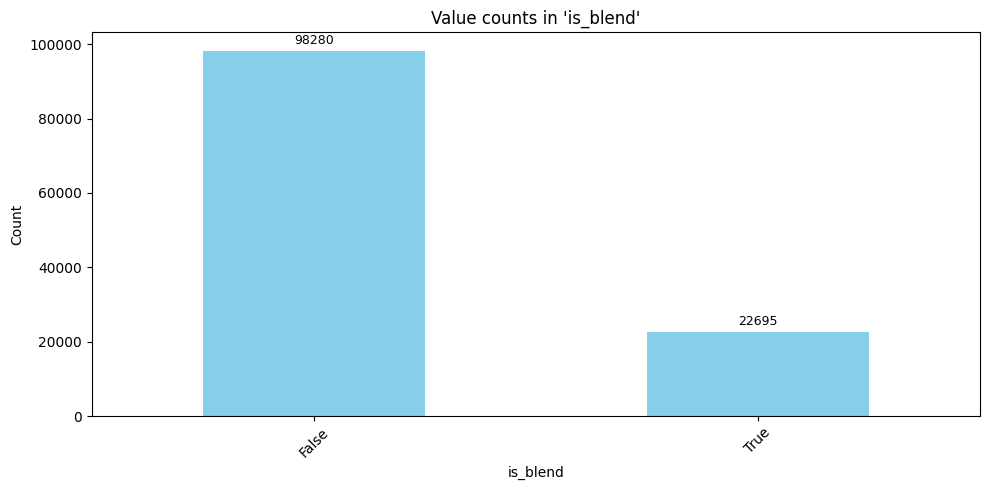

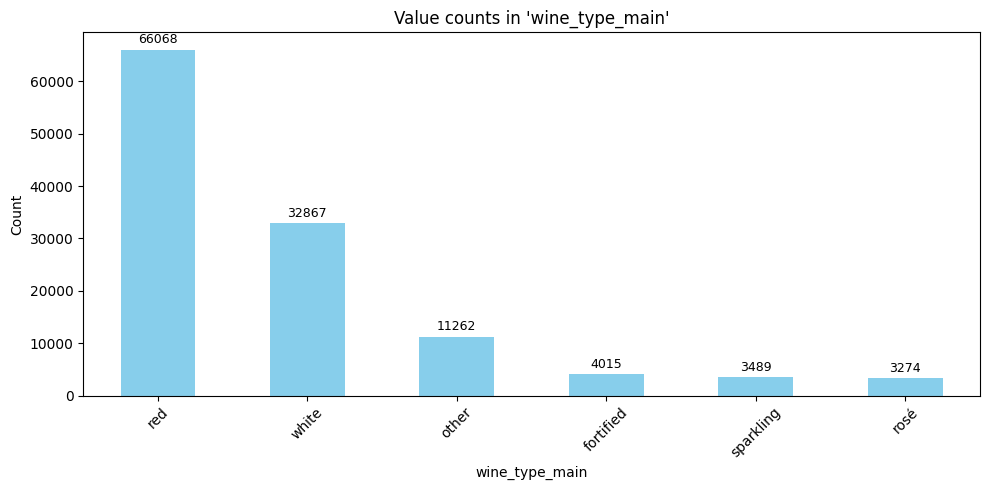

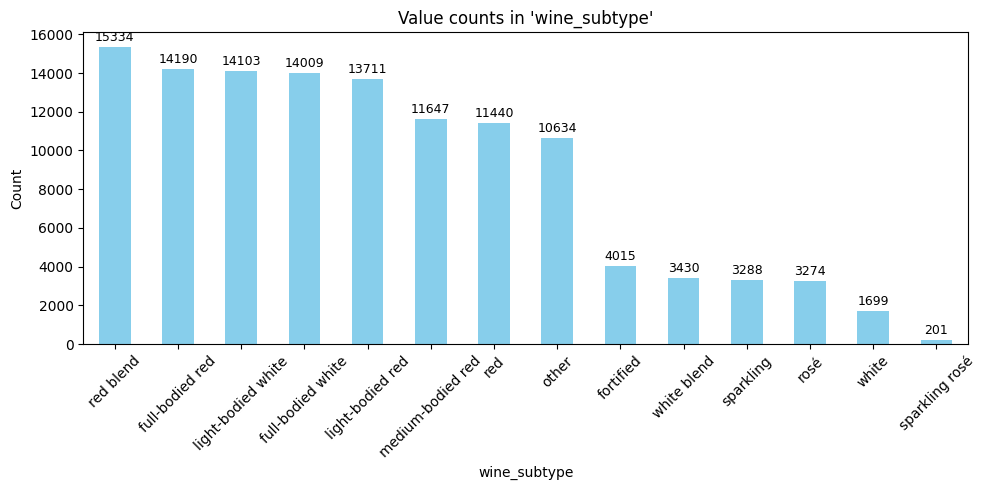

In [113]:
import matplotlib.pyplot as plt

# Categorical/binary features to plot directly
categorical_cols = ['continent', 'points_category', 'is_blend', "wine_type_main", "wine_subtype"]

for col in categorical_cols:
    top_values = df_clean[col].value_counts()
    
    plt.figure(figsize=(10, 5))
    ax = top_values.plot(kind='bar', color='skyblue')
    plt.title(f"Value counts in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    for i, value in enumerate(top_values):
        ax.text(i, value + max(top_values)*0.01, str(value), ha='center', va='bottom', fontsize=9)
    
    plt.show()

In [114]:
other_main = df_clean[df_clean['wine_type_main'] == 'other']['variety'].value_counts().head(30)
print(other_main)


variety
Glera                604
Carmenère            567
Nero d'Avola         326
Sauvignon            302
Melon                241
Mourvèdre            226
Blaufränkisch        206
Primitivo            203
Zweigelt             182
G-S-M                180
Mencía               173
Touriga Nacional     173
Tannat               169
Dolcetto             168
Roussanne            167
Tinta de Toro        165
Verdicchio           161
Pinot Nero           159
Monastrell           146
Turbiana             146
Pinot Bianco         144
Pinotage             132
Sémillon             131
Fiano                130
Vernaccia            126
Alvarinho            116
Friulano             112
Nerello Mascalese    111
Greco                111
Grillo               109
Name: count, dtype: int64
